# Desafio Estatística Frequências e Medidas

**Aluna:** Natália Ferreira  
**Squad:** Sônia Guimarães

Considerando a base de dados de *enem_2023.json* responda as questões abaixo (os dados são fictícios).

Você é uma pesquisadora de um cursinho para estudantes que querem ingressar na universidade em 2025. Seu objetivo é retirar informações da base de dados do enem do ano anterior para alinhar melhor as estratégias do cursinho para cada estudante.
O dado possui 6 colunas, 5 delas representam as disciplinas do ENEM e uma o gênero das pessoas que fizeram a prova. No dado existe a representação de 1000 pessoas, sendo cada uma delas uma linha.


In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Análise Exploratória e Limpeza dos Dados

In [ ]:
# Carregar os dados do arquivo JSON
with open('enem_2023.json', 'r') as file:
    dados_enem = json.load(file)

# Converter o dicionário em um DataFrame
df = pd.DataFrame(dados_enem)

# Visualizar as primeiras linhas do DataFrame em forma de tabela
print(df.head())

   Linguagens  Ciências humanas  Ciências da natureza  Matemática     Redação  \
0  585.669300        686.512178            390.482473  452.281333  546.371706   
1  359.384608        642.084134                   NaN  412.205207  741.825256   
2  622.732384        495.510719            443.183580  669.683401  684.515750   
3  350.164605        602.041588            413.979810  676.608952  671.237114   
4  384.093657        489.249140            609.758123  520.426698  744.375048   

     Sexo  
0   Homem  
1  Mulher  
2   Homem  
3   Homem  
4   Homem  


In [ ]:
# Contar valores nulos em cada coluna
valores_nulos = df.isnull().sum()

# Contar zeros em cada coluna
valores_zeros = df.eq(0).sum()

# Imprimir os resultados
print("Contagem de valores nulos em cada coluna:")
print(valores_nulos)
print("\nContagem de zeros em cada coluna:")
print(valores_zeros)

Contagem de valores nulos em cada coluna:
Linguagens              103
Ciências humanas         64
Ciências da natureza    176
Matemática               76
Redação                 140
Sexo                      0
dtype: int64

Contagem de zeros em cada coluna:
Linguagens              0
Ciências humanas        0
Ciências da natureza    0
Matemática              0
Redação                 0
Sexo                    0
dtype: int64


## Resolução dos Exercícios

1. Qual das disciplinas tem a maior amplitude de nota?

In [ ]:
'''a amplitude é uma medida da dispersão dos dados em torno de um conjunto de valores.
Em outras palavras, é a diferença entre o maior e o menor valor em um conjunto de dados.'''

# Calcular a amplitude de nota de cada disciplina
amplitudes = {}
for disciplina, valores in dados_enem.items():
    if disciplina != "Sexo":  # Excluir a coluna de sexo
        notas = [float(nota) for nota in valores]  # Acessar diretamente os valores das notas
        amplitude = max(notas) - min(notas)
        amplitudes[disciplina] = amplitude

# Encontrar a disciplina com a maior amplitude
disciplina_maior_amplitude = max(amplitudes, key=amplitudes.get)
maior_amplitude = amplitudes[disciplina_maior_amplitude]

# Imprimir o resultado
print(f"A disciplina com a maior amplitude de nota é '{disciplina_maior_amplitude}' com amplitude de {maior_amplitude:.2f}.")


A disciplina com a maior amplitude de nota é 'Linguagens' com amplitude de 999.00.


2. Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se de remover todos os valores nulos quando considerar a mediana)

In [ ]:
# Remover valores nulos para calcular a mediana
df_sem_nulos = df.dropna()

# Calcular a média de cada disciplina
medias = df.mean(numeric_only=True)

# Calcular a mediana de cada disciplina
medianas = df_sem_nulos.median(numeric_only=True)

# Imprimir os resultados
print("Média de cada disciplina:")
print(medias)
print("\nMediana de cada disciplina:")
print(medianas)

Média de cada disciplina:
Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64

Mediana de cada disciplina:
Linguagens              517.128831
Ciências humanas        528.503263
Ciências da natureza    502.935209
Matemática              532.961486
Redação                 639.602691
dtype: float64


3. Considerando o curso de Ciência da Computação da UFPE, onde o peso cada uma das disciplinas ponderado:

- Redação - 2
- Matemática e suas Tecnologias - 4
- Linguagens, Códigos e suas Tecnologias - 2
- Ciências Humanas e suas Tecnologias - 1
- Ciências da Natureza e suas Tecnologias - 1

Qual o desvio padrão e média das notas dos 500 estudantes mais bem colocados considerando esses pesos?

In [ ]:
# Remover valores nulos
df_sem_nulos = df.dropna().copy()

# Aplicar os pesos às notas das disciplinas
pesos = {
    'Linguagens': 2,
    'Ciências humanas': 1,
    'Ciências da natureza': 1,
    'Matemática': 4,
    'Redação': 2
}

for disciplina, peso in pesos.items():
    df_sem_nulos[disciplina] *= peso

# Calcular a média das notas de cada aluno
df_sem_nulos['Média'] = df_sem_nulos.mean(axis=1, numeric_only=True)

# Selecionar as notas dos 500 estudantes mais bem colocados
notas_500_melhores = df_sem_nulos['Média'].nlargest(500)

# Calcular a média das notas dos 500 estudantes mais bem colocados
media = notas_500_melhores.mean()

# Calcular o desvio padrão das notas dos 500 estudantes mais bem colocados
desvio_padrao = notas_500_melhores.std()

# Imprimir os resultados
print(f"Média das notas dos 500 estudantes mais bem colocados: {media:.2f}")
print(f"Desvio padrão das notas dos 500 estudantes mais bem colocados: {desvio_padrao:.2f}")


Média das notas dos 500 estudantes mais bem colocados: 1114.58
Desvio padrão das notas dos 500 estudantes mais bem colocados: 80.87


4. Se todos esses estudantes aplicassem para ciência da computação e existem apenas 40 vagas, qual seria a variância e média da nota dos estudantes que entraram no curso de ciência da computação?

In [ ]:
# Selecionar as notas dos 40 estudantes mais bem colocados
notas_40_melhores = df_sem_nulos['Média'].nlargest(40)

# Calcular a média das notas dos 40 estudantes mais bem colocados
media_40 = notas_40_melhores.mean()

# Calcular a variância das notas dos 40 estudantes mais bem colocados
variancia_40 = notas_40_melhores.var()

# Calcular o desvio padrão das notas dos 40 estudantes mais bem colocados
desvio_padrao_40 = notas_40_melhores.std()

# Encontrar a menor nota entre os 40 estudantes que entraram no curso de Ciência da Computação
menor_nota = notas_40_melhores.min()

# Encontrar a menor nota entre os 40 estudantes que entraram no curso de Ciência da Computação
maior_nota = notas_40_melhores.max()

# Imprimir os resultados
print(f"Média das notas dos 40 estudantes que entraram no curso de Ciência da Computação: {media_40:.2f}")
print(f"Variância das notas dos 40 estudantes que entraram no curso de Ciência da Computação: {variancia_40:.2f}")
print(f"Desvio padrão das notas dos 40 estudantes que entraram no curso de Ciência da Computação: {desvio_padrao_40:.2f}")
print("Menor nota entre os estudantes que entraram no curso de Ciência da Computação:", menor_nota)
print("Maior nota entre os estudantes que entraram no curso de Ciência da Computação:", maior_nota)

Média das notas dos 40 estudantes que entraram no curso de Ciência da Computação: 1273.37
Variância das notas dos 40 estudantes que entraram no curso de Ciência da Computação: 1183.07
Desvio padrão das notas dos 40 estudantes que entraram no curso de Ciência da Computação: 34.40
Menor nota entre os estudantes que entraram no curso de Ciência da Computação: 1238.4254209137
Maior nota entre os estudantes que entraram no curso de Ciência da Computação: 1365.9754648542998


5. Qual o valor do teto do terceiro quartil para as disciplinas de matemática e linguagens?

In [ ]:
# Dados das disciplinas de Matemática e Linguagens
notas_matematica = df_sem_nulos['Matemática']
notas_linguagens = df_sem_nulos['Linguagens']

# Calculando o terceiro quartil para Matemática e Linguagens
q3_matematica = np.percentile(notas_matematica, 75)
q3_linguagens = np.percentile(notas_linguagens, 75)

# Encontrando o teto do terceiro quartil para Matemática e Linguagens
teto_q3_matematica = np.ceil(q3_matematica)
teto_q3_linguagens = np.ceil(q3_linguagens)

# Imprimindo os resultados
print(f"Teto do terceiro quartil para Matemática: {teto_q3_matematica}")
print(f"Teto do terceiro quartil para Linguagens: {teto_q3_linguagens}")

Teto do terceiro quartil para Matemática: 2366.0
Teto do terceiro quartil para Linguagens: 1146.0


6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos. Podemos dizer que são histogramas simétricos, justifique e classifique se não assimétricas?

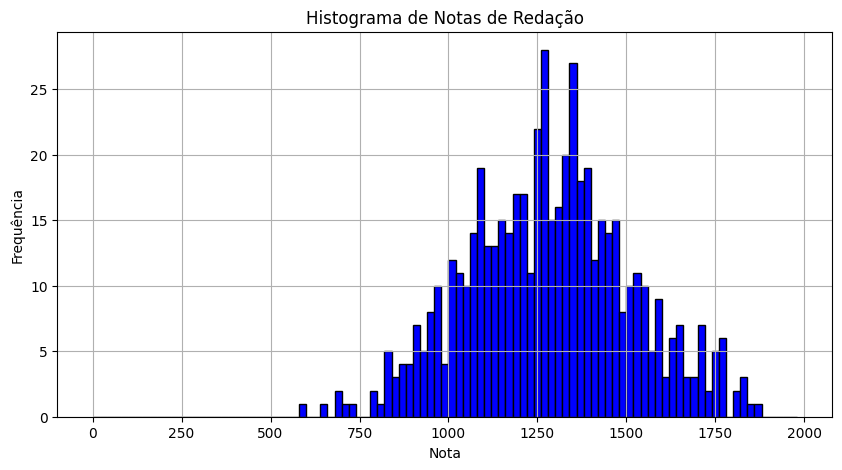

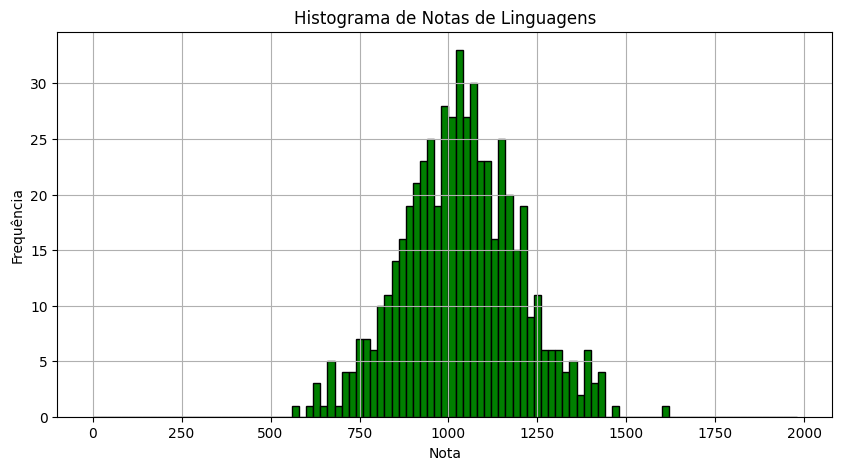

In [ ]:
# Definir intervalos para os histogramas
intervalos = range(0, 2000, 20)

# Plotar histograma para Redação
plt.figure(figsize=(10, 5))
plt.hist(df_sem_nulos['Redação'], bins=intervalos, color='blue', edgecolor='black')
plt.title('Histograma de Notas de Redação')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Plotar histograma para Linguagens
plt.figure(figsize=(10, 5))
plt.hist(df_sem_nulos['Linguagens'], bins=intervalos, color='green', edgecolor='black')
plt.title('Histograma de Notas de Linguagens')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

Ambos aparentam simetria.

7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma opinião quanto a simetria? plt.hist(dado, bins=_, range=[0, 1000])

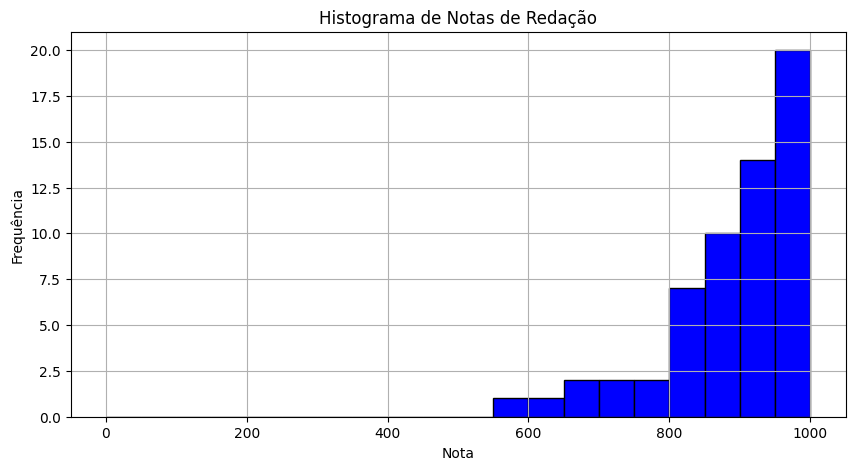

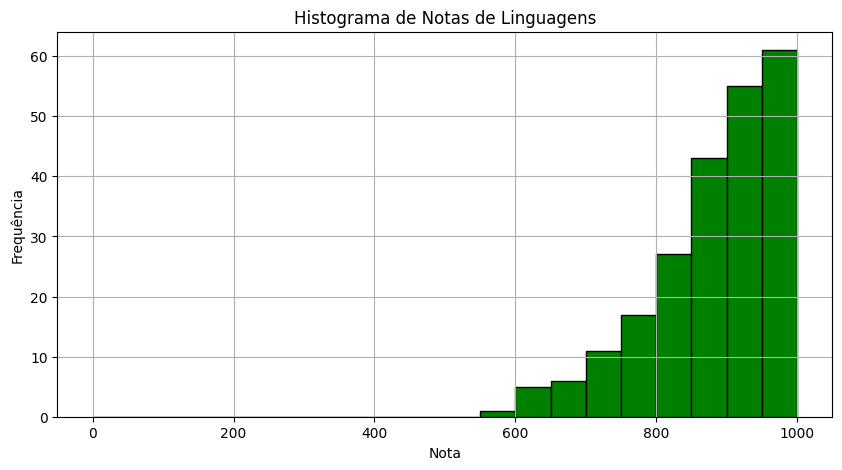

In [ ]:
# Definir intervalo fixo de 0 a 1000
intervalo_fixo = [0, 1000]

# Plotar histograma para Redação
plt.figure(figsize=(10, 5))
plt.hist(df_sem_nulos['Redação'], bins=20, range=intervalo_fixo, color='blue', edgecolor='black')
plt.title('Histograma de Notas de Redação')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Plotar histograma para Linguagens
plt.figure(figsize=(10, 5))
plt.hist(df_sem_nulos['Linguagens'], bins=20, range=intervalo_fixo, color='green', edgecolor='black')
plt.title('Histograma de Notas de Linguagens')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

Ambos são **Histogramas de distorcido à esquerda** (ou com calda a esquerda), pois a frequência dos dados está concentrada nos altos valores, do lado esquerdo, conforme percorremos o eixo x. Isso nos indica que a maior parte da concentração dos dados está no final da distribuição.

8. Faça um boxplot do quartil de todas as disciplinas de ciências da natureza e redação. É possível enxergar outliers? Utilize o método IQR.

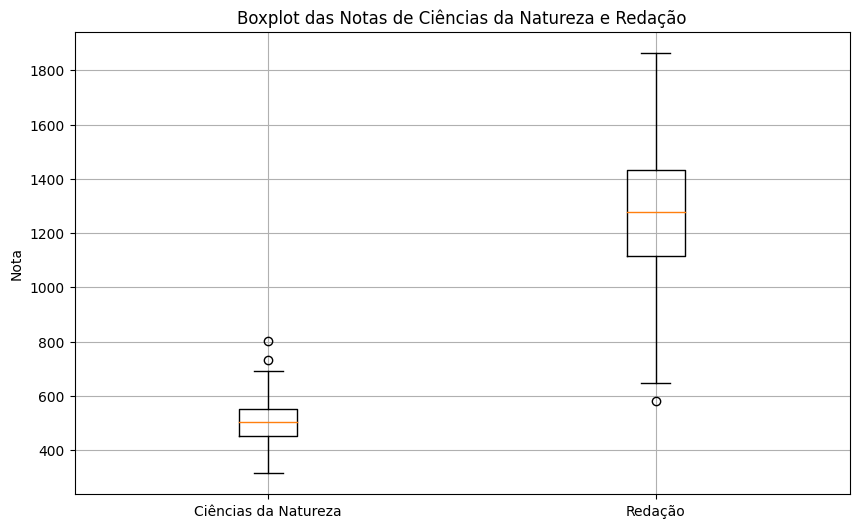

In [ ]:
# Selecionar as notas das disciplinas de Ciências da Natureza e Redação
notas_ciencias_natureza = df_sem_nulos['Ciências da natureza']
notas_redacao = df_sem_nulos['Redação']

# Criar uma lista com as notas das duas disciplinas
notas = [notas_ciencias_natureza, notas_redacao]

# Criar o boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(notas, labels=['Ciências da Natureza', 'Redação'])
plt.title('Boxplot das Notas de Ciências da Natureza e Redação')
plt.ylabel('Nota')
plt.grid(True)
plt.show()

9. Remova todos os outliers e verifique se eles são passíveis de alterar a média nacional significativamente? (considere significativamente um valor acima de 5%)

In [ ]:
# Função para identificar e remover outliers com base no método IQR
def remove_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = (data < limite_inferior) | (data > limite_superior)
    data_sem_outliers = data[~outliers]
    return data_sem_outliers

# Remover outliers das notas de Ciências da Natureza e Redação
notas_ciencias_natureza_sem_outliers = remove_outliers(notas_ciencias_natureza)
notas_redacao_sem_outliers = remove_outliers(notas_redacao)

# Calcular a média antes e depois de remover os outliers
media_ciencias_natureza = notas_ciencias_natureza.mean()
media_redacao = notas_redacao.mean()
media_ciencias_natureza_sem_outliers = notas_ciencias_natureza_sem_outliers.mean()
media_redacao_sem_outliers = notas_redacao_sem_outliers.mean()

# Calcular a diferença percentual entre as médias
dif_percentual_ciencias_natureza = ((media_ciencias_natureza_sem_outliers - media_ciencias_natureza) / media_ciencias_natureza) * 100
dif_percentual_redacao = ((media_redacao_sem_outliers - media_redacao) / media_redacao) * 100

# Imprimir os resultados
print(f"Média de Ciências da Natureza antes de remover outliers: {media_ciencias_natureza:.2f}")
print(f"Média de Ciências da Natureza depois de remover outliers: {media_ciencias_natureza_sem_outliers:.2f}")
print(f"Diferença percentual em Ciências da Natureza: {dif_percentual_ciencias_natureza:.2f}%")

print(f"\nMédia de Redação antes de remover outliers: {media_redacao:.2f}")
print(f"Média de Redação depois de remover outliers: {media_redacao_sem_outliers:.2f}")
print(f"Diferença percentual em Redação: {dif_percentual_redacao:.2f}%")

Média de Ciências da Natureza antes de remover outliers: 502.14
Média de Ciências da Natureza depois de remover outliers: 501.17
Diferença percentual em Ciências da Natureza: -0.19%

Média de Redação antes de remover outliers: 1282.39
Média de Redação depois de remover outliers: 1283.67
Diferença percentual em Redação: 0.10%


10. Considerando valores nulos, tente encontrar qual seria a melhor medida de tendência que pode substituir as notas nulas. Média, moda ou mediana? Substitua o valor por todos os três e diga qual delas altera menos a média geral e o desvio padrão.

In [ ]:
# Carregar os dados do arquivo JSON
with open('enem_2023.json', 'r') as file:
    dados_enem = json.load(file)

# Converter o dicionário em um DataFrame
questao_10 = pd.DataFrame(dados_enem)

# Investigar o Dataframe
questao_10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Linguagens            897 non-null    float64
 1   Ciências humanas      936 non-null    float64
 2   Ciências da natureza  824 non-null    float64
 3   Matemática            924 non-null    float64
 4   Redação               860 non-null    float64
 5   Sexo                  1000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 54.7+ KB


In [ ]:
# Checar valores faltantes
questao_10.isnull().sum()

Linguagens              103
Ciências humanas         64
Ciências da natureza    176
Matemática               76
Redação                 140
Sexo                      0
dtype: int64

In [ ]:
# Excluir a coluna 'Sexo' dos cálculos
questao_10_numericas = questao_10.drop(columns=['Sexo'])

# Substituir valores nulos usando média, moda e mediana
media_substituida = questao_10_numericas.fillna(questao_10_numericas.mean())
moda_substituida = questao_10_numericas.fillna(questao_10_numericas.mode().iloc[0])
mediana_substituida = questao_10_numericas.fillna(questao_10_numericas.median())

# Calcular média geral e desvio padrão para cada substituição
media_geral_media = media_substituida.stack().mean()
desvio_padrao_media = media_substituida.stack().std()

media_geral_moda = moda_substituida.stack().mean()
desvio_padrao_moda = moda_substituida.stack().std()

media_geral_mediana = mediana_substituida.stack().mean()
desvio_padrao_mediana = mediana_substituida.stack().std()

# Comparar os resultados
print("Substituindo com média:")
print(f"Média geral: {media_geral_media:.2f}")
print(f"Desvio padrão: {desvio_padrao_media:.2f}")

print("\nSubstituindo com moda:")
print(f"Média geral: {media_geral_moda:.2f}")
print(f"Desvio padrão: {desvio_padrao_moda:.2f}")

print("\nSubstituindo com mediana:")
print(f"Média geral: {media_geral_mediana:.2f}")
print(f"Desvio padrão: {desvio_padrao_mediana:.2f}")


Substituindo com média:
Média geral: 542.93
Desvio padrão: 97.43

Substituindo com moda:
Média geral: 515.13
Desvio padrão: 123.36

Substituindo com mediana:
Média geral: 542.83
Desvio padrão: 97.35
